In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from skimage.io import imread


In [2]:
# Define path to the data directory
data_dir = Path(r'D:\Final Year project\archive\TB_Chest_Radiography_Database/')

data_dir

WindowsPath('D:/Final Year project/archive/TB_Chest_Radiography_Database')

In [3]:
# Get the path to the normal and pneumonia sub-directories
normal_cases_dir = Path(r'D:\Final Year project\archive\TB_Chest_Radiography_Database\Normal/')
Tuberculosis_cases_dir = Path(r'D:\Final Year project\archive\TB_Chest_Radiography_Database\Tuberculosis/')

# Get the list of all the images
normal_cases = normal_cases_dir.glob('*.png')
Tuberculosis_cases = Tuberculosis_cases_dir.glob('*.png')

# An empty list. We will insert the data into this list in (img_path, label) format
train_data = []

# Go through all the normal cases. The label for these cases will be 0
for img in normal_cases:
    train_data.append((img,0))

# Go through all the pneumonia cases. The label for these cases will be 1
for img in Tuberculosis_cases:
    train_data.append((img, 1))

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'],index=None)

# Shuffle the data 
train_data = train_data.sample(frac=1.).reset_index(drop=True)

# How the dataframe looks like?
train_data.head()

,image,label
0,D:\Final Year project\archive\TB_Chest_Radiogr...,0
1,D:\Final Year project\archive\TB_Chest_Radiogr...,1
2,D:\Final Year project\archive\TB_Chest_Radiogr...,0
3,D:\Final Year project\archive\TB_Chest_Radiogr...,0
4,D:\Final Year project\archive\TB_Chest_Radiogr...,0


In [4]:
train_data.shape

(4200, 2)

label
0    3500
1     700
Name: count, dtype: int64


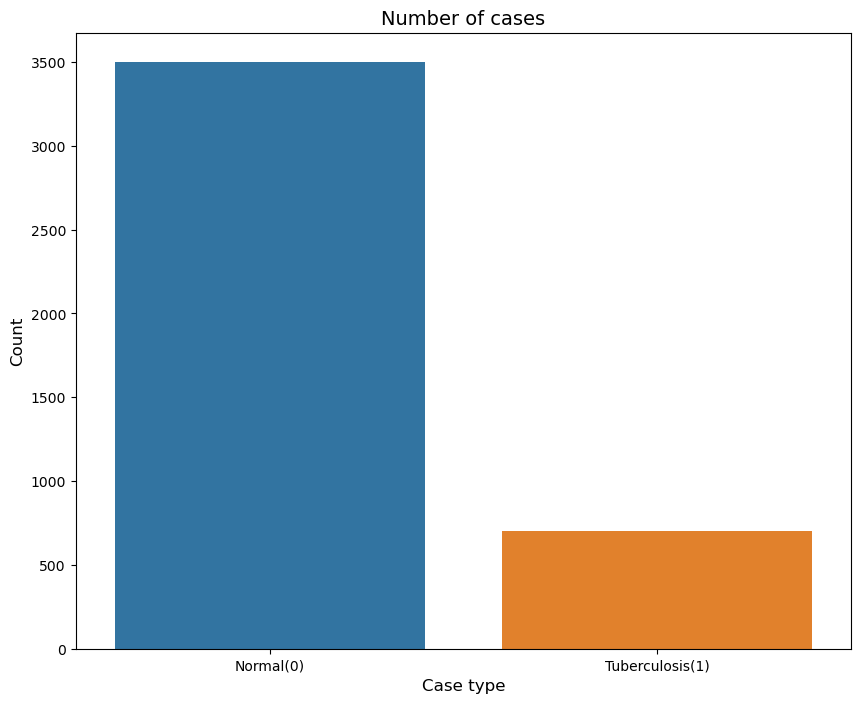

In [5]:
# Get the counts for each class
cases_count = train_data['label'].value_counts()
print(cases_count)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count.index, y= cases_count.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Tuberculosis(1)'])
plt.show()

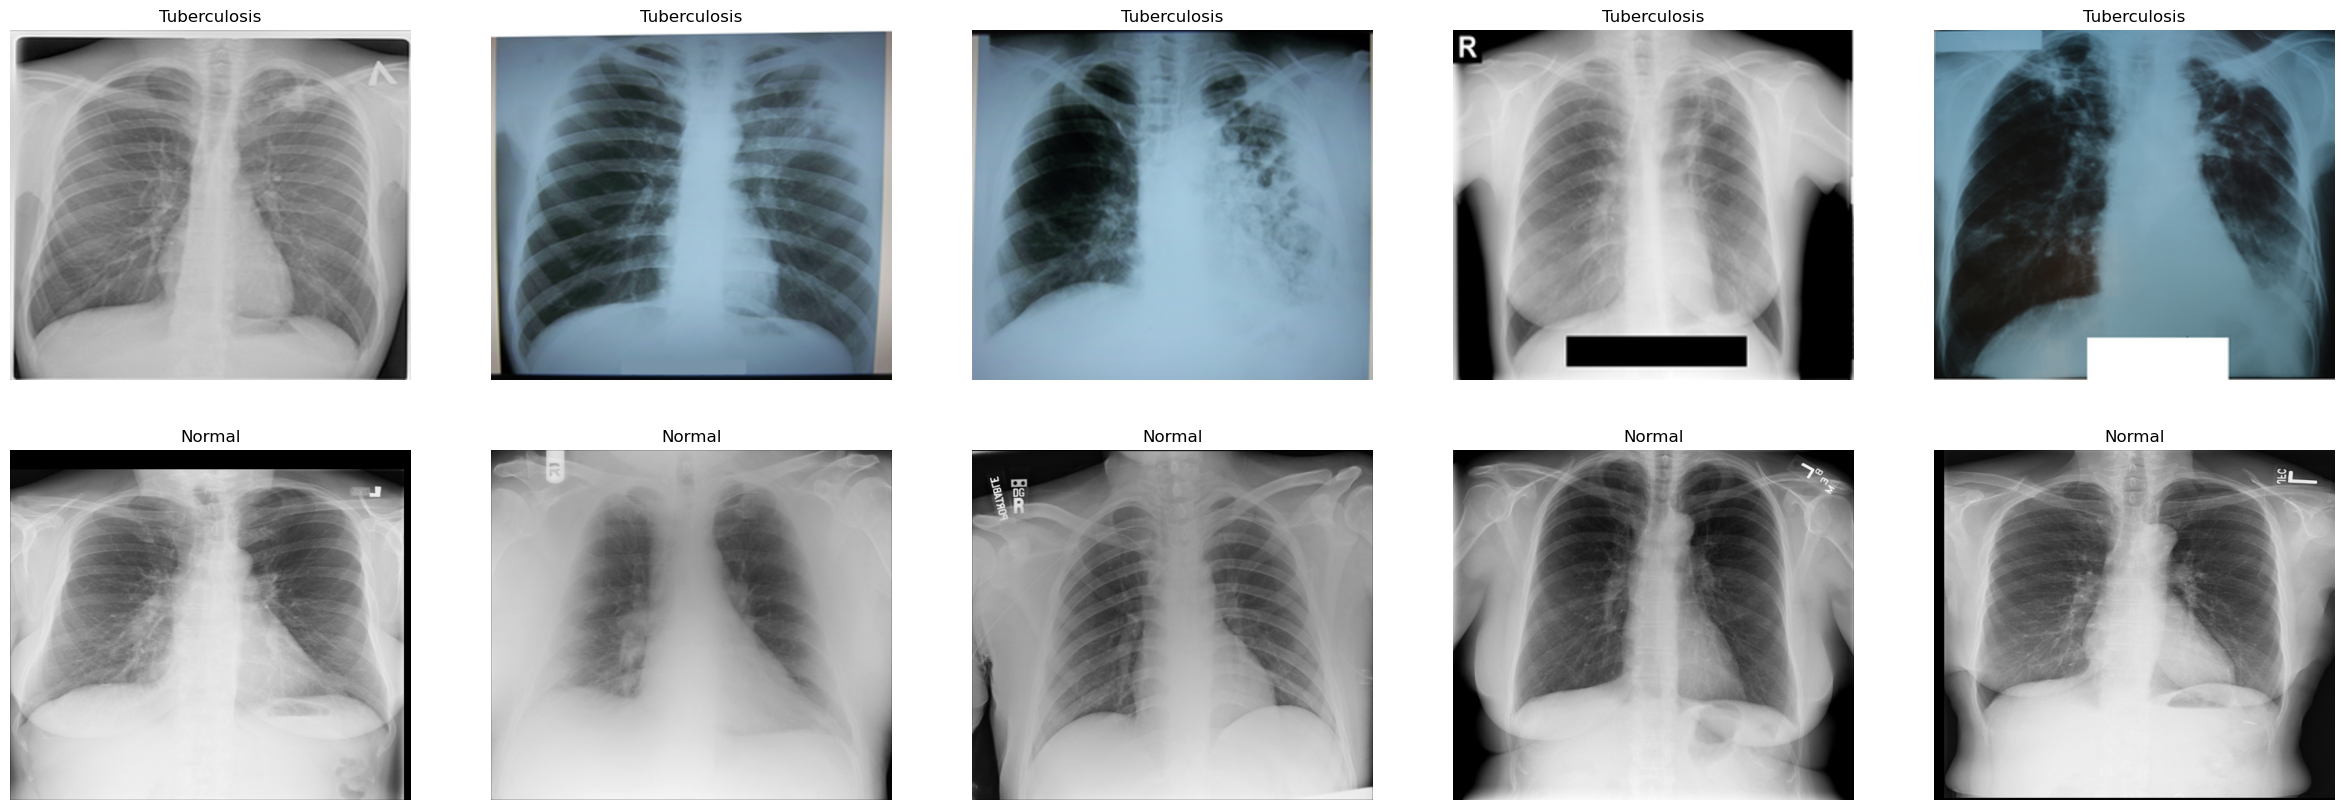

In [6]:
# Get few samples for both the classes
Tuberculosis_samples = (train_data[train_data['label']==1]['image'].iloc[:5]).tolist()
normal_samples = (train_data[train_data['label']==0]['image'].iloc[:5]).tolist()

# Concat the data in a single list and del the above two list
samples = Tuberculosis_samples + normal_samples
del Tuberculosis_samples, normal_samples

# Plot the data 
f, ax = plt.subplots(2,5, figsize=(30,10))
for i in range(10):
    img = imread(samples[i])
    ax[i//5, i%5].imshow(img, cmap='gray')
    if i<5:
        ax[i//5, i%5].set_title("Tuberculosis")
    else:
        ax[i//5, i%5].set_title("Normal")
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_aspect('auto')
plt.show()

In [7]:
# !pip install tensorflow

In [8]:
from tqdm import tqdm
from pathlib import Path
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical

train_normal = Path(r'D:\Final Year project\archive\TB_Chest_Radiography_Database\Normal/')
train_Tuberculosis =  Path(r'D:\Final Year project\archive\TB_Chest_Radiography_Database\Tuberculosis/')

# Get the list of all the images
normal_cases = train_normal.glob('*.png')
Tuberculosis_cases = train_Tuberculosis.glob('*.png')
train_data = []
train_labels = []

for img in tqdm(normal_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28, 28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img / 255
    label = 'normal'
    train_data.append(img)
    train_labels.append(label)

# Tuberculosis cases        
for img in tqdm(Tuberculosis_cases):
    img = cv2.imread(str(img))
    img = cv2.resize(img, (28, 28))
    if img.shape[2] == 1:
        img = np.dstack([img, img, img])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    img = img / 255
    label = 'Tuberculosis'
    train_data.append(img)
    train_labels.append(label)

# Convert the list into numpy arrays
train_data1 = np.array(train_data)
train_labels1 = np.array(train_labels)

print("Total number of training examples: ", train_data1.shape)
print("Total number of labels:", train_labels1.shape)


3500it [00:23, 149.32it/s]
700it [00:04, 144.10it/s]

Total number of training examples:  (4200, 28, 28, 3)
Total number of labels: (4200,)


In [9]:
train_data[1]

array([[[0.03921569, 0.03921569, 0.03921569],
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        ...,
        [0.56470588, 0.56470588, 0.56470588],
        [0.60392157, 0.60392157, 0.60392157],
        [0.6745098 , 0.6745098 , 0.6745098 ]],

       [[0.05098039, 0.05098039, 0.05098039],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.05882353, 0.05882353, 0.05882353],
        ...,
        [0.03137255, 0.03137255, 0.03137255],
        [0.01960784, 0.01960784, 0.01960784],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.04705882, 0.04705882, 0.04705882],
        [0.05098039, 0.05098039, 0.05098039],
        [0.03529412, 0.03529412, 0.03529412],
        ...,
        [0.05098039, 0.05098039, 0.05098039],
        [0.04705882, 0.04705882, 0.04705882],
        [0.03529412, 0.03529412, 0.03529412]],

       ...,

       [[0.0627451 , 0.0627451 , 0.0627451 ],
        [0.0627451 , 0.0627451 , 0.0627451 ],
        [0.03921569, 0

In [10]:
train_labels1.shape

(4200,)

In [11]:
train_data1.shape

(4200, 28, 28, 3)

In [12]:
train_labels1 = pd.DataFrame(train_labels1, columns=[ 'label'],index=None)
train_labels1.head()

,label
0,normal
1,normal
2,normal
3,normal
4,normal


In [13]:
train_labels1['label']=train_labels1['label'].map({'normal':0,'Tuberculosis':1})
train_labels1['label'].unique()

array([0, 1], dtype=int64)

In [14]:
# !pip install scikit-learn==1.2.2
# !pip install --upgrade imbalanced-learn
# # !pip install --upgrade imbalanced-learn

In [15]:
from imblearn.over_sampling._smote import SMOTE
# from sklearn.utils._param_validation import _MissingValues 
# from imblearn.utils._validation import _check_X

import numpy as np

smt = SMOTE()
train_rows=len(train_data1)
train_data1 = train_data1.reshape(train_rows,-1)
train_data2, train_labels2 = smt.fit_resample(train_data1, train_labels1)

label
0    3500
1    3500
Name: count, dtype: int64


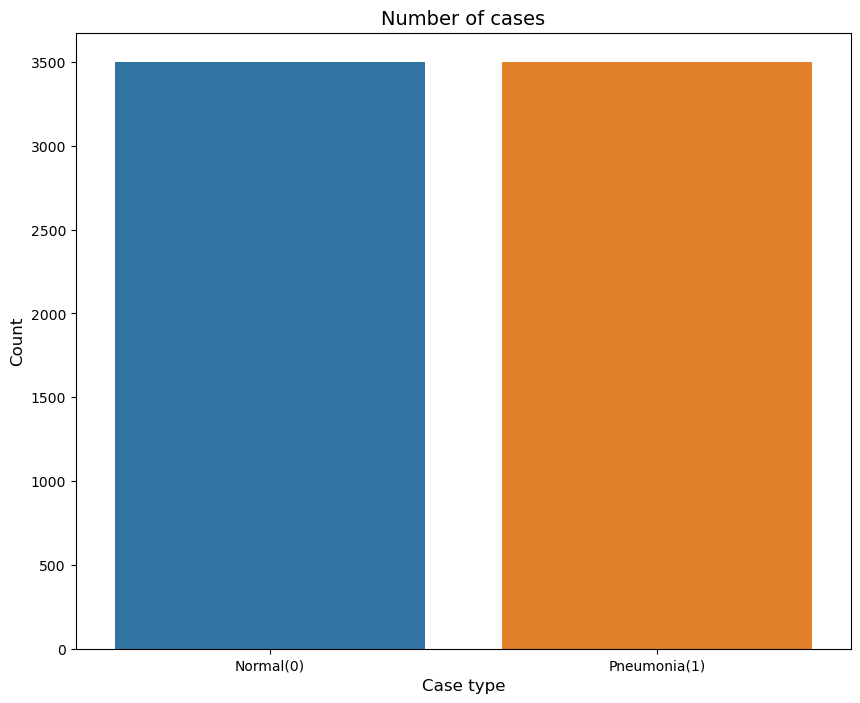

In [16]:
cases_count1 = train_labels2['label'].value_counts()
print(cases_count1)

# Plot the results 
plt.figure(figsize=(10,8))
sns.barplot(x=cases_count1.index, y= cases_count1.values)
plt.title('Number of cases', fontsize=14)
plt.xlabel('Case type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(range(len(cases_count.index)), ['Normal(0)', 'Pneumonia(1)'])
plt.show()

In [17]:
train_data2.shape

(7000, 2352)

In [18]:
train_labels2.shape

(7000, 1)

In [19]:
train_labels2

,label
0,0
1,0
2,0
3,0
4,0
...,...
6995,1
6996,1
6997,1
6998,1


In [20]:
train_data2 =train_data2.reshape(-1,28,28,3)

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data2, train_labels2, test_size=0.13, random_state=42)

In [24]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(28,
                                  28,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
      
  ]
)

In [25]:
import tensorflow as tf
from tensorflow.keras import  layers, models

model = models.Sequential([
    data_augmentation,
    layers.Conv2D(28, (3, 3), activation='relu', input_shape=(28, 28, 3)) ,
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
    
])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)        

In [26]:
model.add(layers.Flatten())
model.add(layers.Dense(640, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(564, activation='tanh'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(2))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 28)        784       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 28)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        16192     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)         

Epoch 1/100
191/191 [==============================] - 11s 33ms/step - loss: 0.0874 - accuracy: 0.9706 - val_loss: 0.0831 - val_accuracy: 0.9725
Epoch 2/100
191/191 [==============================] - 6s 29ms/step - loss: 0.0814 - accuracy: 0.9713 - val_loss: 0.1354 - val_accuracy: 0.9637
Epoch 3/100
191/191 [==============================] - 6s 30ms/step - loss: 0.0719 - accuracy: 0.9752 - val_loss: 0.0728 - val_accuracy: 0.9758
Epoch 4/100
191/191 [==============================] - 5s 29ms/step - loss: 0.0773 - accuracy: 0.9724 - val_loss: 0.0656 - val_accuracy: 0.9780
Epoch 5/100
191/191 [==============================] - 6s 30ms/step - loss: 0.0794 - accuracy: 0.9716 - val_loss: 0.1235 - val_accuracy: 0.9538
Epoch 6/100
191/191 [==============================] - 5s 29ms/step - loss: 0.0651 - accuracy: 0.9772 - val_loss: 0.0956 - val_accuracy: 0.9703
Epoch 7/100
191/191 [==============================] - 5s 28ms/step - loss: 0.0611 - accuracy: 0.9793 - val_loss: 0.0671 - val_accuracy

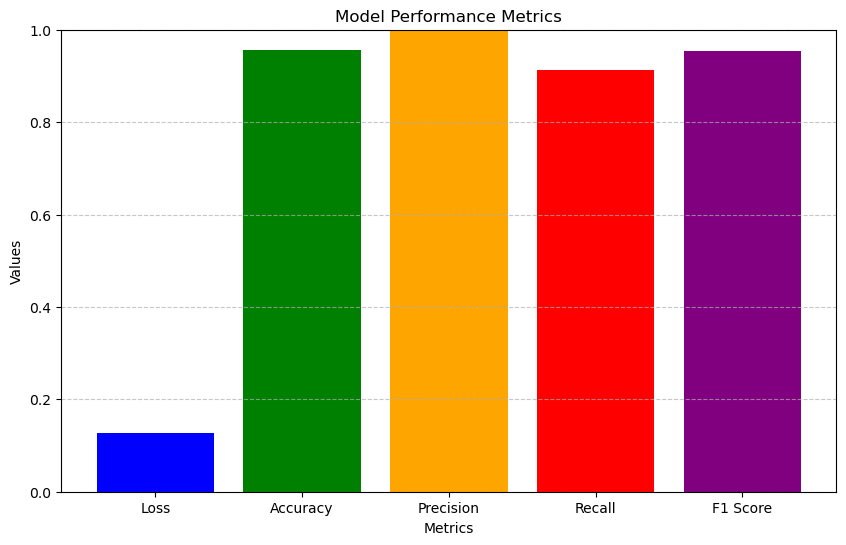

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history=model.fit(np.array(X_train), np.array(y_train), epochs=100, validation_data=(np.array(X_test), np.array(y_test)))
#model.fit(np.array(train_data1), np.array(train_labels1), epochs=10)

loss_value, accuracy_value = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)
precision_value = precision_score(y_test, predictions.argmax(axis=1))
recall_value = recall_score(y_test, predictions.argmax(axis=1))
f1_score_value = f1_score(y_test, predictions.argmax(axis=1))

# Print the evaluation metrics
print(f"Loss: {loss_value}")
print(f"Accuracy: {accuracy_value}")
print(f"Precision: {precision_value}")
print(f"Recall: {recall_value}")
print(f"F1 Score: {f1_score_value}")

# Plot bar graph
metrics = ['Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [loss_value, accuracy_value, precision_value, recall_value, f1_score_value]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Assuming metrics are between 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
train_labels2['label'].unique()

**Testing Our Model**

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_data = []z
image='D:\\Final Year project\\Example For Testing\\healthy.jpg'
img = cv2.imread(str(image))
img = cv2.resize(img, (28,28))
if img.shape[2] ==1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img=np.array(img)
img = img/255
test_data.append(img)
    
# Convert the list into numpy arrays

test_data1 = np.array(test_data)

In [ ]:
test_data1.shape

In [ ]:
a=model.predict(np.array(test_data1))
a

In [ ]:
np.argmax(a)

In [ ]:
if(np.argmax(a)==0):
    print("Not Tuberculosis")
else:
    print("Tuberculosis")

In [ ]:
model.save('my_model1')
model.save('D:\\Final Year project\\metadata/my_model1')


In [ ]:
new_model = tf.keras.models.load_model('D:\\Final Year project\\metadata\\my_model1')

# Check its architecture
new_model.summary()
new_model

In [ ]:
a=new_model.predict(np.array(test_data1))
a

In [ ]:
image='D:\\Final Year project\\Example For Testing\\healthy.jpg'
img = cv2.imread(str(image))

In [ ]:
# Importing Image module from PIL package 
from PIL import Image 
import PIL 
  
# creating a image object (main image) 
im1 = Image.open(image) 
  
# save a image using extension
im1 = im1.save("tb1.jpg")

In [ ]:
your_image_path = 'D:\\Final Year project\\Example For Testing\\healthy.jpg'
img = cv2.imread(your_image_path)
img = cv2.resize(img, (28, 28))

# Preprocess the image
if img.shape[2] == 1:
    img = np.dstack([img, img, img])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img) / 255.0

# Reshape and predict
img = img.reshape(1, 28, 28, 3)  # Assuming 3 channels
prediction = new_model.predict(img)

# Get the predicted class
predicted_class = np.argmax(prediction)
print(f'The predicted class is: {predicted_class}')